<a href="https://colab.research.google.com/github/rinaove/KAGGLE/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8A%B9%EA%B0%9D%EB%A7%8C%EC%A1%B1%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2주차: Flight Passenger Satisfaction: EDA and Prediction

## ✅ 이번주 목표
- [ ] 승객 만족도 데이터셋인 만큼 **EDA**에 집중해보기
- [ ] 이런식으로도 EDA 할 수 있구나!!!!!
- *주의*: The data set was quite clean devoid of the hassles related to imbalance or too many missing values etc.Hence, I concentrated mainly on `doing extensive EDA through putting different visualizations here`





## ✳️ 컬럼 설명

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 1. Importing Data

In [2]:
# Importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

train_file_path = '/content/drive/MyDrive/Kaggle/flight/train.csv'
test_file_path = '/content/drive/MyDrive/Kaggle/flight/test.csv'

train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [4]:
# Get row and column count

train.shape

(103904, 25)

In [5]:
# Get a snapshot of data

train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [6]:
# Drop unnecessary columns

train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

> ❓ 의문점

* 왜 `id`까지 drop 하시는거지?
* 모델링 돌리려면 필요없긴 하지만, EDA 후에 drop해도 되는 값 아닌가?

In [7]:
# Check size of the data set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

> ❓ 의문점

* 출발시간(분)은 int고, 도착시간(분)은 왜 float인 것인가... 통일하면 좋을듯하다

In [8]:
test.shape

(25976, 25)

In [9]:
test.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [10]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [12]:
# Replace spaces in the column names with underscore

train.columns = [c.replace(' ', '_') for c in train.columns]

In [13]:
test.columns = [c.replace(' ', '_') for c in test.columns]

In [14]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)

/tmp/ipython-input-14-1203727122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)
/tmp/ipython-input-14-1203727122.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['satisfaction'].replace({'neut

In [15]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

/tmp/ipython-input-15-3262876218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
/tmp/ipython-input-15-3262876218.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['satisfaction'].replace({'neutral

## 2. Checking for Imbalance

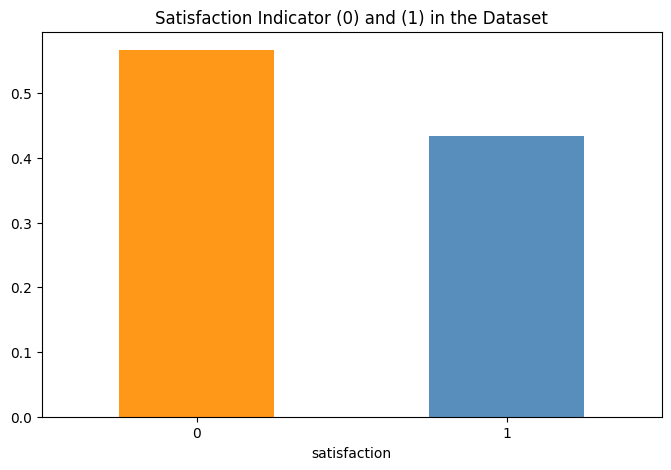

In [16]:
# Checking the nature of data set: balanced or imbalanced?

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize=True).plot(kind='bar', color=['darkorange', 'steelblue'], alpha=0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

## 3. Handling of Missing Data

In [17]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Customer_Type,0,0.000000
Gender,0,0.000000
Type_of_Travel,0,0.000000
Class,0,0.000000


In [18]:
# Imputing missing value with mean

train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [19]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [20]:
# Check the list of categorical variables

train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

> ❓ 의문점: 언제 train/test 셋을 합치고 분리할까

* 합쳐서 해도 좋은 것들 (EDA)

| 작업      | 이유                      |
| ------- | ----------------------- |
| 원-핫 인코딩 | 카테고리별 분포 확인용 (누수 아님)    |
| 라벨 인코딩  | 카테고리 숫자화 → 시각화 편리       |
| 로그 변환   | 왜도(skewness) 완화 → 분포 확인 |
| 이상치 탐색  | train/test 분포 차이 비교 가능  |
| 결측치 시각화 | 전체 데이터 누락 패턴 보기 위함      |


* 합치면 안되는 것들 (모델링)

| 작업                      | 이유                               |
| ----------------------- | -------------------------------- |
| 결측치 채우기 (평균/중앙값)        | test 평균 사용 시 미래 정보 유입            |
| 스케일링 (StandardScaler 등) | train 기준으로만 fit → test transform |
| 타겟 인코딩                  | train 타겟으로만 계산해야 함               |
| 차원축소 (PCA, LDA)         | train 주성분으로만 변환                  |

* 순서: 걍 맘편하게 분리하고 시작하는게 낫지 않나...

| 단계          | 합쳐/분리 | 이유                        |
| ----------- | ----- | ------------------------- |
| 1. 결측치 시각화  | ✅ 합쳐서 | 전체 누락 패턴 파악               |
| 2. 결측치 채우기  | ❌ 분리  | 누수 방지 (train 값으로 test 처리) |
| 3. EDA      | ✅ 합쳐서 | 데이터 전반 분포 확인              |
| 4. 피처 엔지니어링 | ❌ 분리  | 데이터 누수 방지                 |
| 5. 모델링      | ❌ 분리  | 진짜 test 성능 평가             |


In [21]:
# Replace NaN with mode for categorical variables

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [22]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

> ‼️ 알게된 것

* `mode()`는 시리즈값으로 return됨

## 4. Exploratory Data Analysis

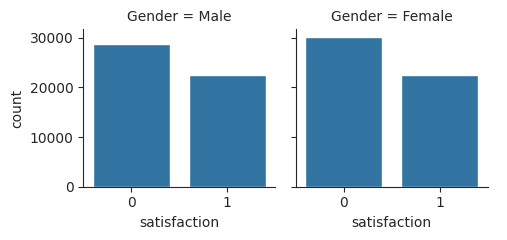

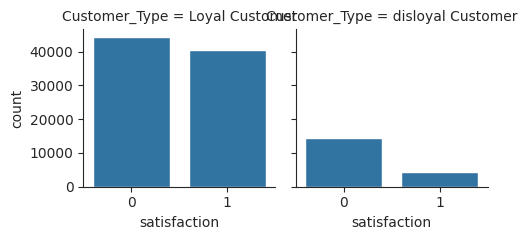

In [23]:
import seaborn as sns
with sns.axes_style(style='ticks'):
  g = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)
  g = sns.catplot(x="satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

> 알게 된 점

* `Customer Type`: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatisfied ones is almost 49:51.
* loyal customers의 만족도 / 불만족도 비율 비슷, but disloyal은 그렇지 않음

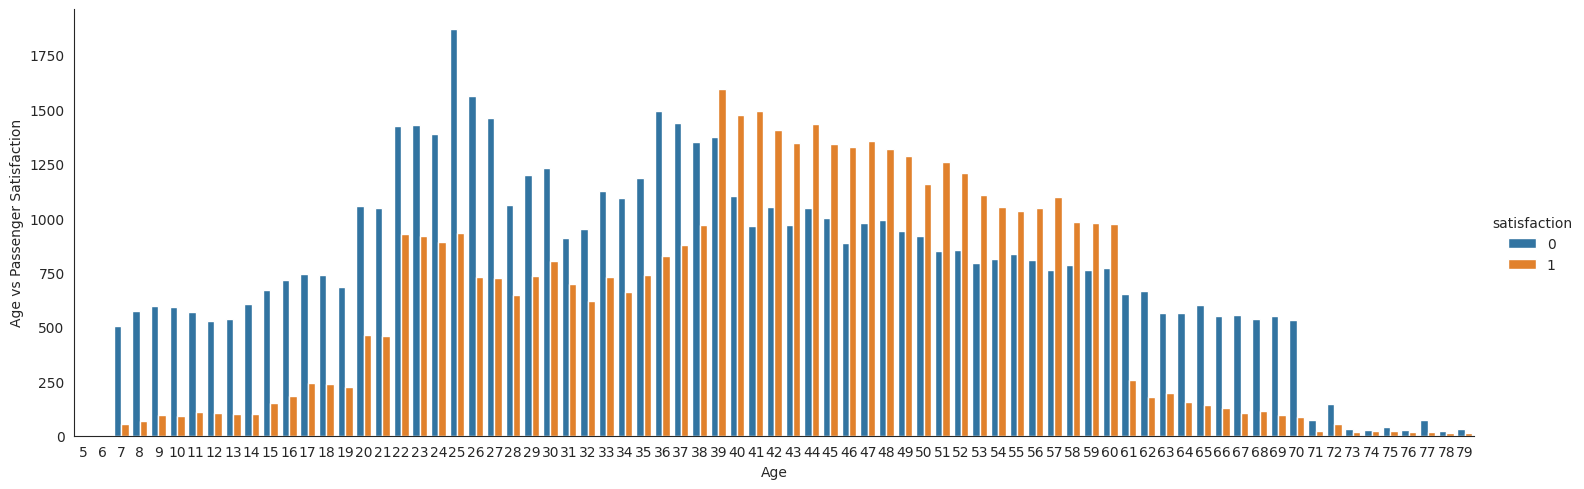

In [24]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

> 알게 된 점

* `Age`: From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.
* 의외로 중간 연령대 분들의 만족도가 높은편

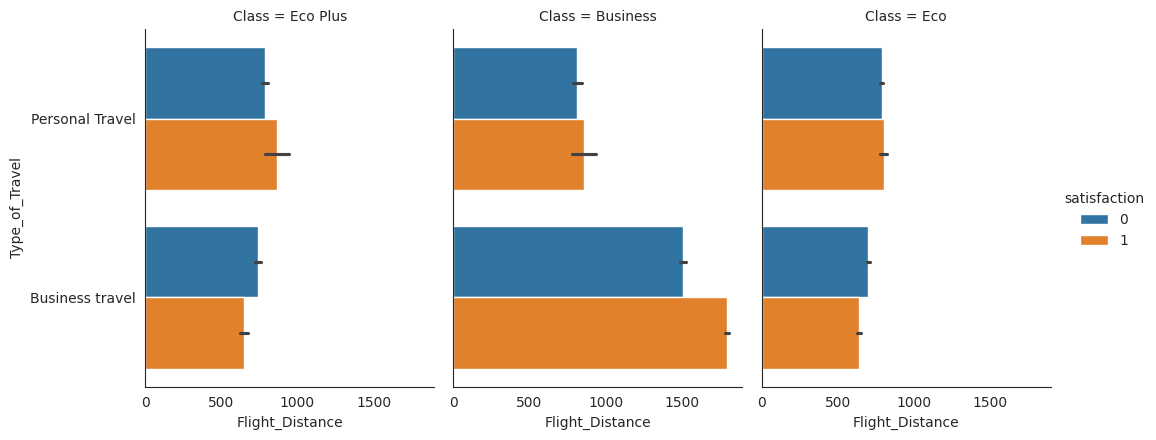

In [25]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

> 알게 된 점

* `Type of Travel, Class, Flight Distance`: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.
*  비즈니스 여행의 비즈니스 클래스 카테고리에서는 긴 비행 거리일수록 만족한 승객의 수가 상당히 많은 편이다. 다른 조합에서는 만족한 승객과 불만족한 승객의 비율이 거의 비슷하게 분포



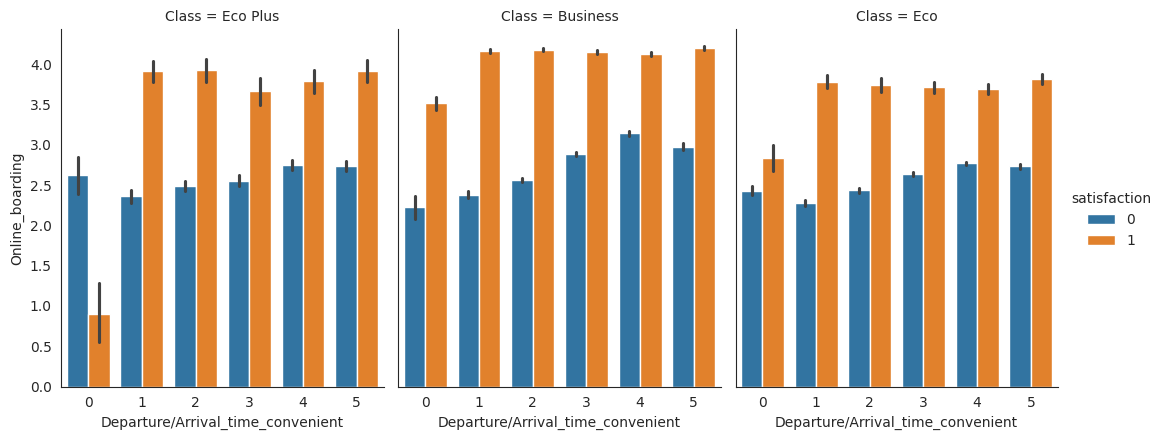

In [26]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

> 알게 된 점

* Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.
*  Eco Plus 클래스의 경우는 온라인 탑승 만족도와 관계없이 출발/도착 시간이 불편하면 불만족한 승객이 많음

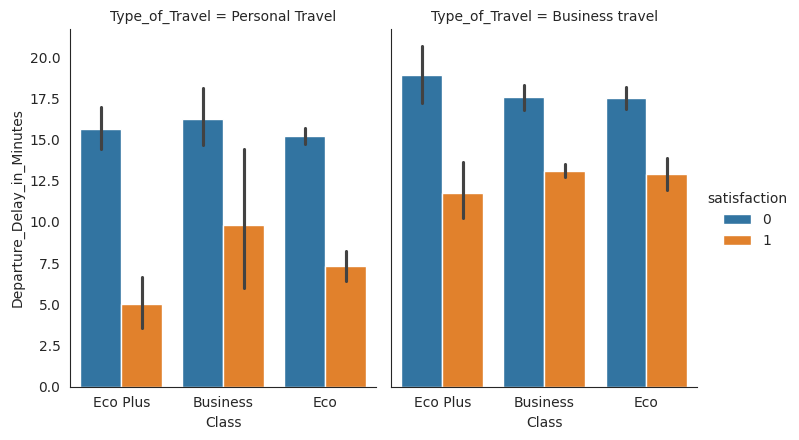

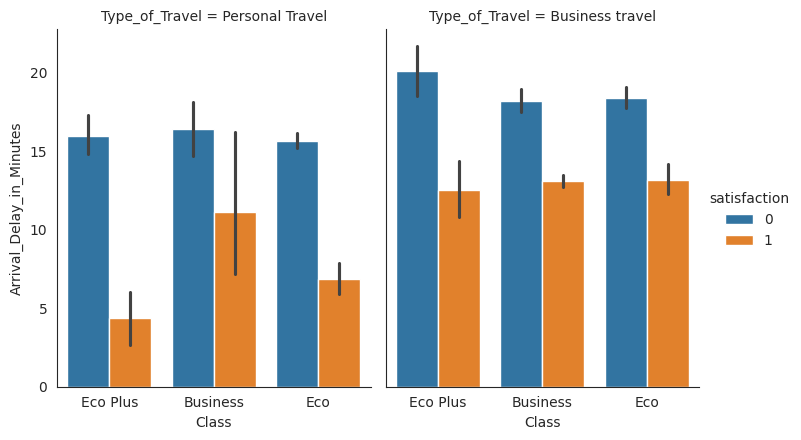

In [27]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

> 알게 된 점
* 개인 여행 + 저가 클래스(Eco Plus, Eco) → 도착 지연이 클수록 불만족 ↑↑
* 전반적으로 지연이 발생한 경우는 어느 클래스/여행 유형이든 만족보다 불만족이 많음.
* 전반적으로 eco plus에 불만있으신 분들 많으신듯...

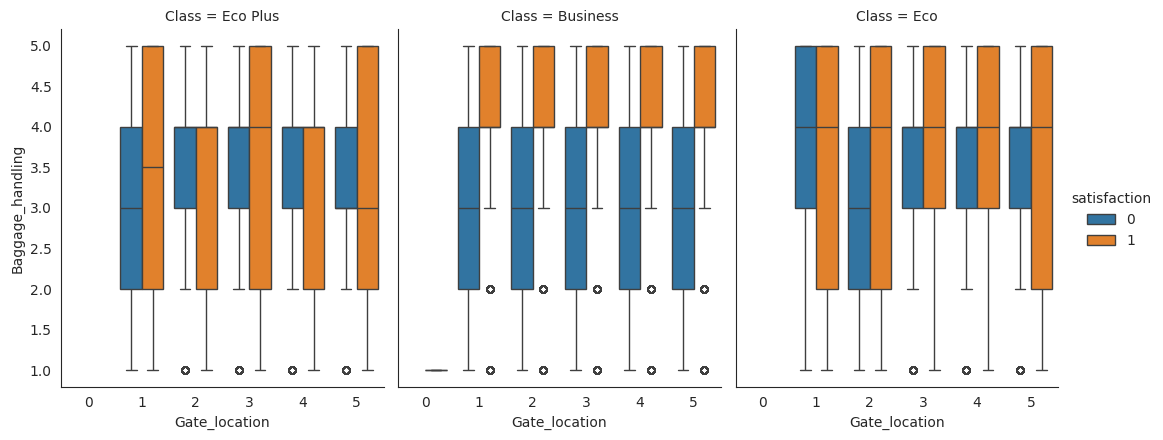

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

> 알게 된 점
* ✅ 비즈니스 클래스 → 수하물 처리 완벽하지 않으면 탑승구 상관없이 불만족 ↑
* ✅ 에코 플러스 → 게이트 1 + 수하물 보통 → 불만족 지속
* ✅ 에코 → 게이트 2 + 수하물 보통 → 불만족 지속



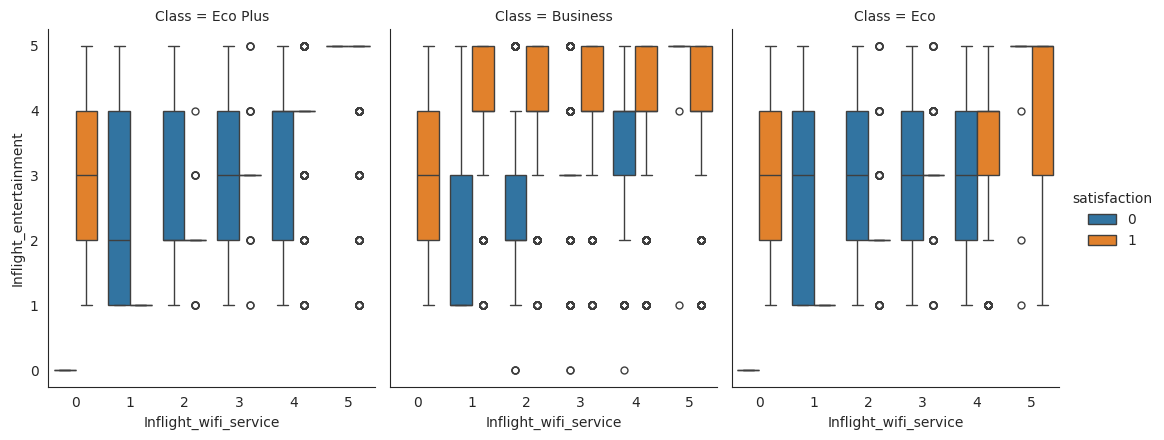

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

> 알게 된 점
* ✅ 에코 플러스 → Wi-Fi 없어도 됨 + 엔터테인먼트 중간 수준이면 OK
* ✅ 비즈니스 → 엔터테인먼트 최고 점수 필수
* ✅ 에코 → 엔터테인먼트 높음 + Wi-Fi 최고 점수 필요

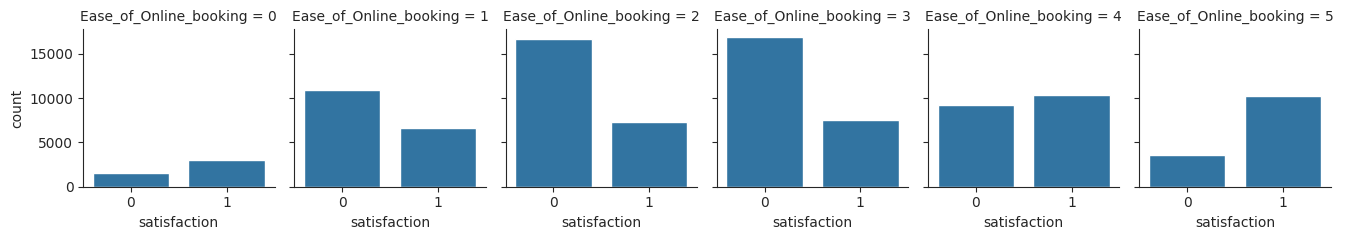

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

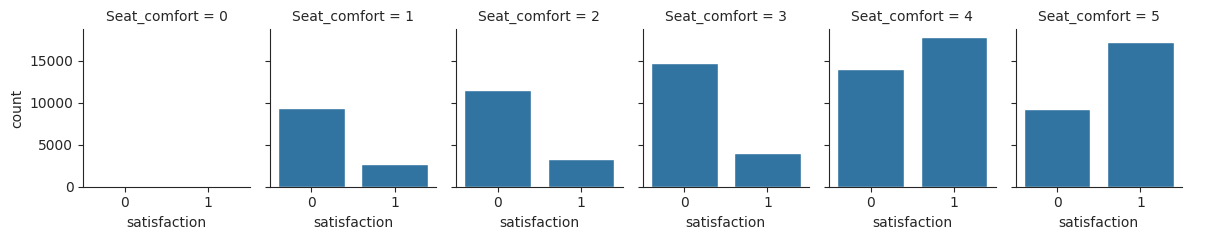

In [31]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

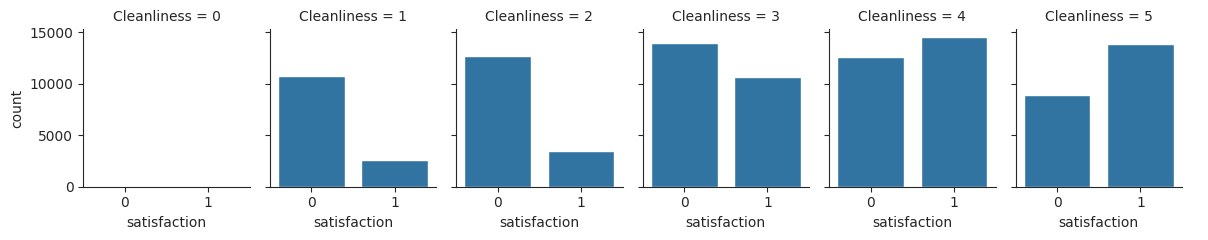

In [32]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

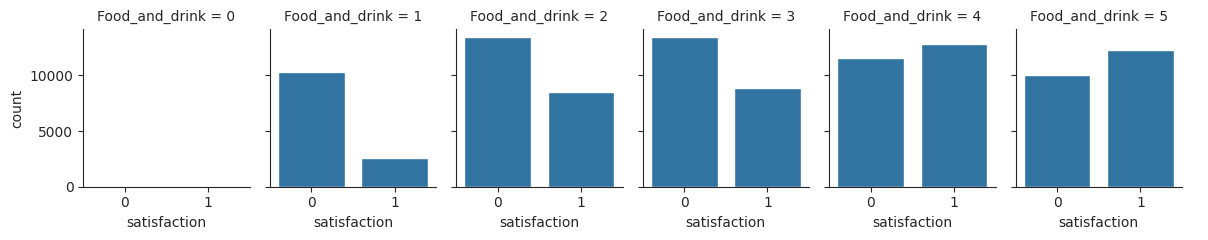

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

> 알게 된 점
* 온라인 부킹, 좌석 편함: 4점 기점으로 만족도 수 증가, 1~3점대 사이 만족도보다 불만족도 비율이 더 높아짐
* 청결도, 음식: 점수가 올라갈수록 만족도가 가파르게 증가

> 아쉬운 점
* 이 네 지표 모두 4점 기준으로 만족도와 불만족도 비율이 달라진다고 함.
* 그러나, 온라인 부킹, 좌석편함도는 1~3점 사이 불만족도 비율이 만족도에 비해 빠르게 증가.

<Axes: xlabel='Leg_room_service', ylabel='satisfaction'>

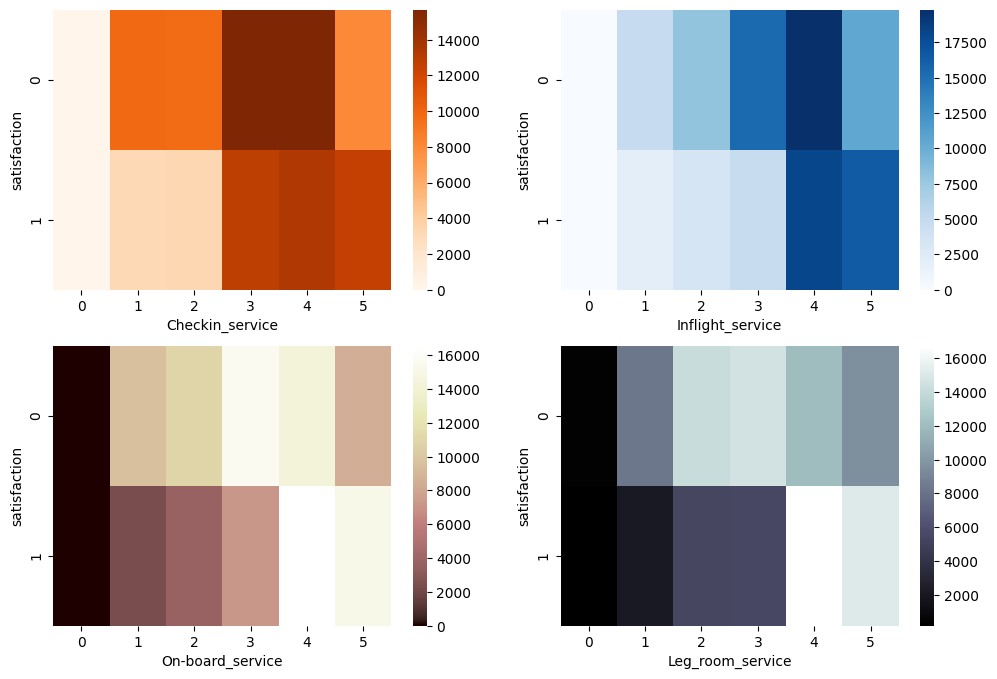

In [34]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

> 알게 된 점

* `ax=axarr[0][0]`: 여러 서브플롯 중 첫 번째 위치에 그리기.

> 알게 된 점

* Checkin Service
→ 점수 0~2점 → 거의 다 불만족 고객

* Inflight / On-board / Leg-room Service
→ 점수 4~5점 → 만족 고객
→ 즉, 이 세 서비스는 높은 점수를 줘야 만족 카테고리에 들어감.



## Label Encoding of Categorical Variables

In [35]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [36]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

> 알게 된 점

* `LabelEncoder`
→ 문자열 형태의 범주형 데이터를 숫자형(0, 1, 2, ...)으로 변환해주는 인코더.
* `lencoders[col] = LabelEncoder()`
→ 각 문자열 컬럼마다 LabelEncoder 인스턴스를 생성하고 lencoders 딕셔너리에 저장.


## Outliers Detection and Removal

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer_Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [38]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [39]:
# Removing outliers from dataset (이상치 없는 행만 선택)

train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape # return = 행, 열

(61197, 23)

> 알게 된 점

* .any(axis=1)
  * 각 행(row)에 대해 이상치가 하나라도 있으면 True.
  * 즉, 행(row) 단위로 이상치가 포함된 레코드를 표시.



## Correlation among Features

<Axes: >

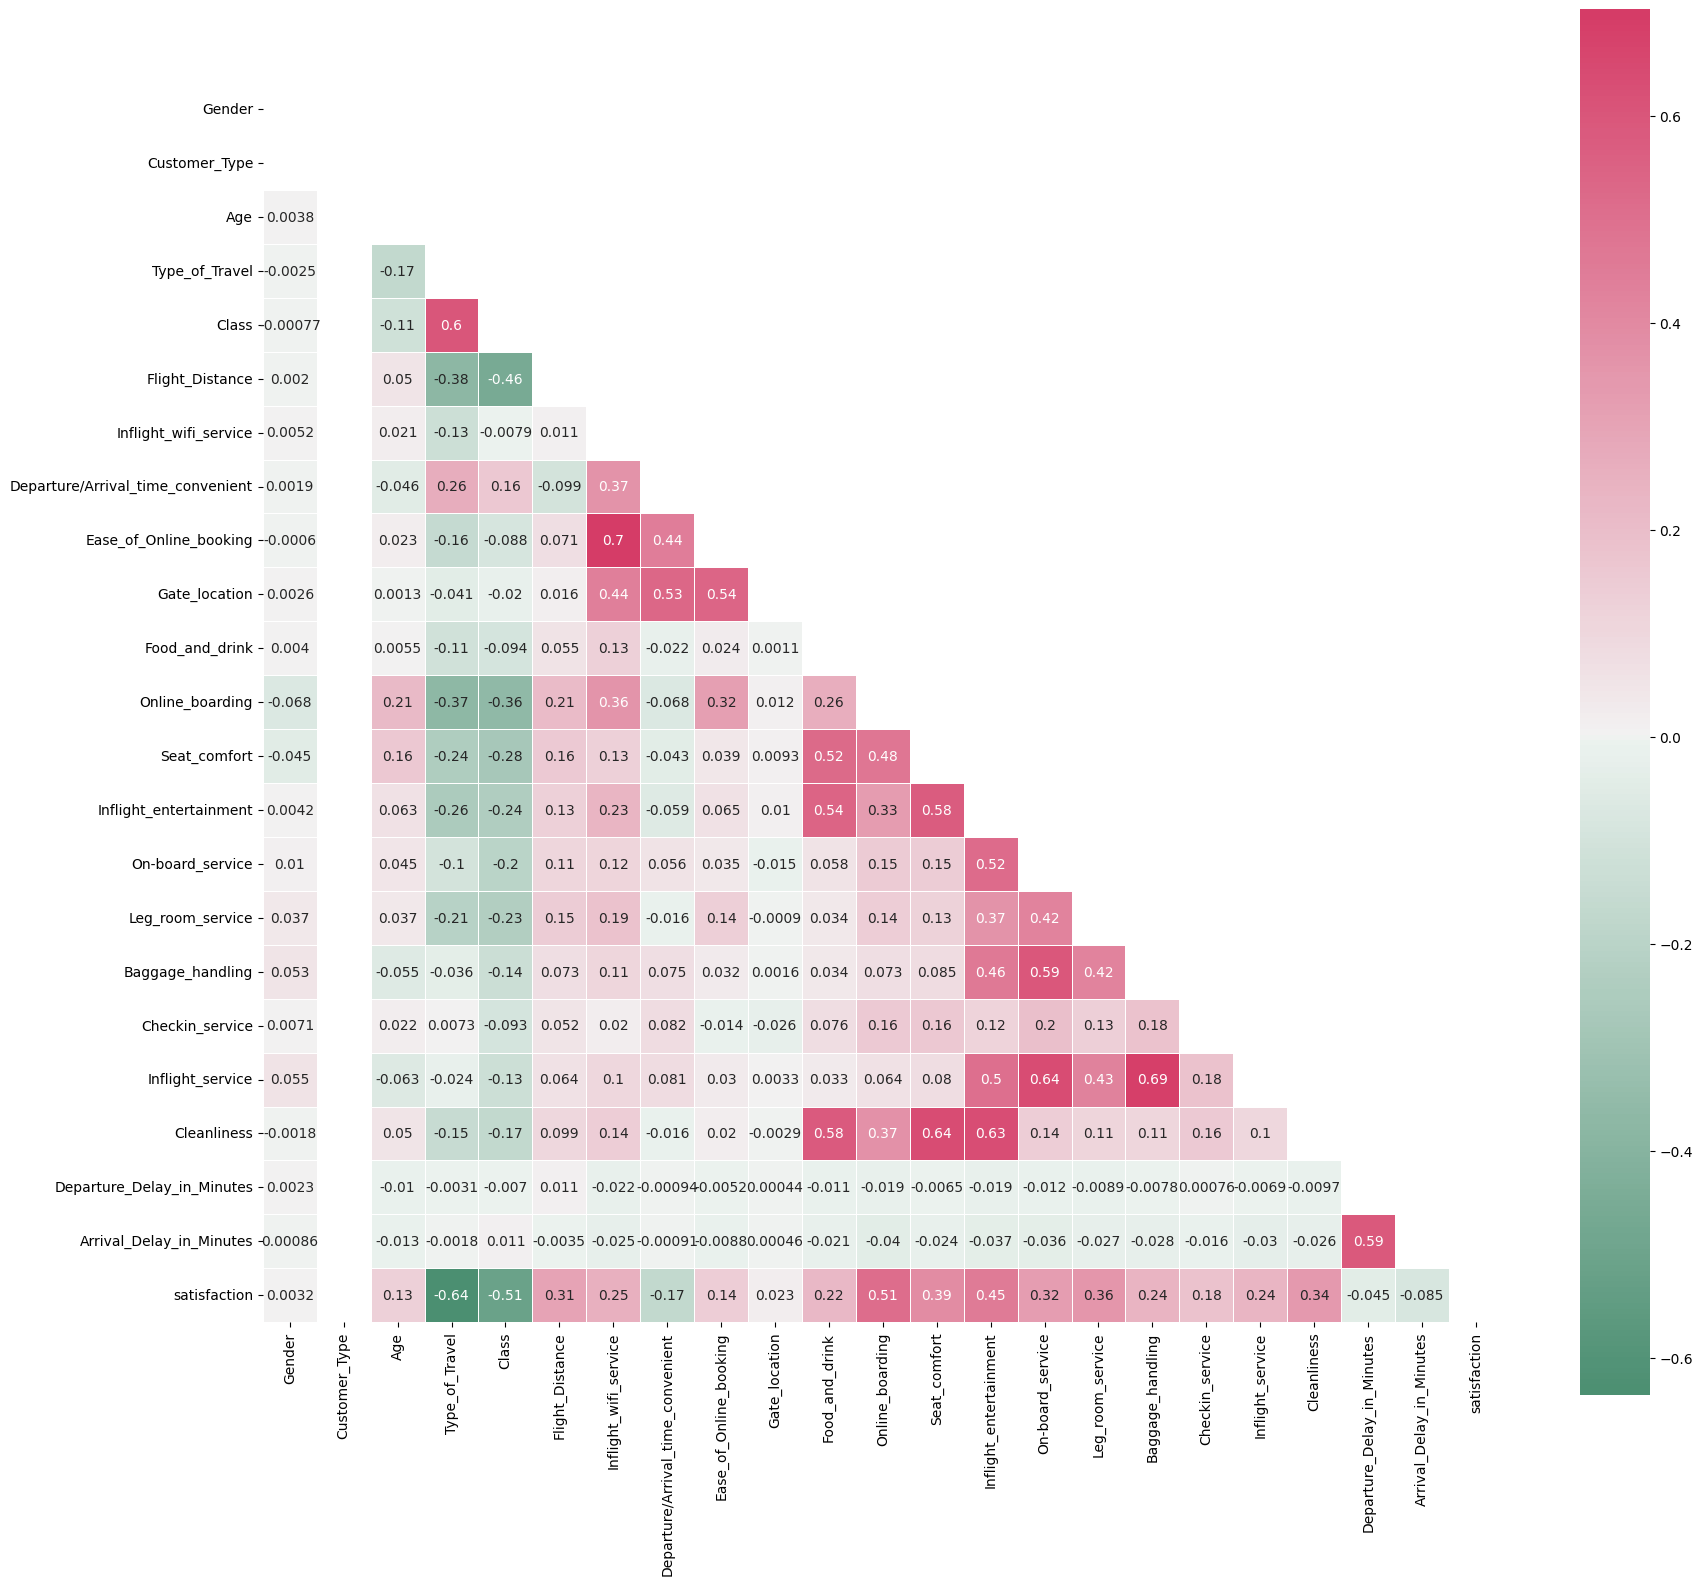

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

> 알게 된 점

* `mask = np.triu(np.ones_like(corr, dtype=np.bool))`
  * np.ones_like(corr) → 상관행렬과 동일 크기의 1로 채워진 배열.
  * np.triu(...) → 배열의 상삼각 부분만 1, 나머지는 0.
  * dtype=np.bool → 부울(boolean) 배열로 변환.

* `sns.heatmap(...)` 주요 옵션 설명

| 옵션                     | 설명                                                                                      |
|-------------------------|---------------------------------------------------------------------------------------------|
| `corr`                  | 데이터 (상관행렬)                                                                          |
| `mask=mask`             | 상삼각 부분 가리기 (대칭 행렬의 한쪽만 표시)                                               |
| `cmap=cmap`             | 색상 팔레트 설정                                                                           |
| `center=0`              | 색상의 중앙 기준을 0으로 설정 (양/음 상관관계 대비 강조)                                   |
| `square=True`           | 각 셀을 정사각형으로 표시                                                                   |
| `annot=True`            | 각 셀에 상관계수 값 표시                                                                    |
| `linewidths=0.5`        | 셀 경계선 두께                                                                              |
| `cbar_kws={"shrink": .9}`| 컬러바(legend) 크기 90%로 축소                                                             |


* 어느 쌍도 상관계수가 정확히 1인 경우는 없으므로 완전 다중공선성(perfect multicollinearity)은 없다. 따라서 어떤 변수도 제거하지 않음
* 의문: 근데 0.7 정도면 높은거 아닌가?
  * VIF > 10인거 제거
  * 차원 축소도 해봄직함 (청결, 편안함, 시간 등 묶을 수 있는 부분도 있으니까..)

## Top 10 Feature Selection through Chi-Square

In [41]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)

modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [42]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


> 알게 된 점

* selector = SelectKBest(chi2, k=10)
  * SelectKBest: 상위 k개 피처 선택하는 사이킷런 클래스.
  * chi2: 카이제곱 통계량을 사용하여 각 피처와 타깃 간의 독립성 테스트.
  * k=10: 상위 10개 피처만 선택.

* 왜 카이제곱으로?
  * **타겟(y)**이 **범주형(예: 만족/불만족)**일 때 적합
  * 만족도(1/0) 같이 이진 분류일 때 잘 맞음
  * 빠르고 직관적 → 데이터 전처리 단계에서 빠르게 피처 후보 줄일 때 최적

* chi2는 수치형 X와 이진형 y에 사용 가능하지만, X 값은 양수여야 함. (음수나 스케일이 다른 데이터는 표준화 필요)

* fit()과 transform()
  * fit()은 train 데이터에만 사용해야 함.
  * transform()은 train과 test 둘 다 사용 가능 (train에서 학습한 파라미터 그대로 적용).

| 메소드               | 하는 일                                 |
| ----------------- | ------------------------------------ |
| `fit()`           | 데이터를 **분석**해서 필요한 **통계값/파라미터**를 학습함. |
| `transform()`     | 이미 학습한 파라미터를 사용해서 데이터를 **변환**함.      |
| `fit_transform()` | `fit()` + `transform()`을 한 번에 실행.    |




## Feature Importance using Wrapper Method

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00412513 0.         0.0258749  0.21982853 0.08990315 0.03140161
 0.12224491 0.01737014 0.03081474 0.01485982 0.01068989 0.11324523
 0.06338185 0.06652081 0.02798984 0.04231821 0.02388634 0.02276466
 0.02411625 0.03309566 0.00702376 0.00854455]


> 알게 된 점

* `get_support()` → 선택된 피처인지 여부를 True/False 배열로 반환
* `print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)`  →  22개 피쳐 중요도 값 나옴
  * RandomForest가 판단한 모든 feature 중요도 값 (전체 feature가 22개니까 22개 값 나옴)

## Feature Permutation Importance

In [44]:
import warnings
warnings.filterwarnings("ignore")

> 이 코드 왜 씀

* 특히 sklearn.inspection.permutation_importance 돌리면 경고가 뜨는 경우 많아:
  * DeprecationWarning: np.bool is a deprecated alias
  * FutureWarning: Scoring method ...
* 이런 거 하나하나 신경 안 써도 결과엔 영향 X
* 그래서 분석 중에 “결과만 보고 싶어, 경고 필요 없어” 할 때 켜놓음.

> Permutation Importance는 왜?

* 모델에 과적합된 feature를 잡아내기
* 상관관계 있는 feature들 중 진짜 중요한 것 찾기
* “모델이 예측할 때 이 변수를 얼마나 썼는가?” 라는 질문에 답
* 저자도 크로스체크용도로 사용했다 함

> 그게 랜포랑 뭔 상관?
* RandomForest의 feature_importances_는 feature가 많이 쪼개질 기회를 가진다면 → 중요도가 부풀려짐
* 반대로 상관관계 feature 중 하나가 먼저 선택되면 → 다른 건 중요도 낮게 나옴
* RandomForest 중요도 순위랑 eli5 중요도 순위 비교해서 차이가 큰 feature들 체크

  ```
  카테고리 feature(범주형) → 레벨(level) 수가 많으면 높게 나옴 (high cardinality bias)

  연속형 feature → 분할 기회가 많아도 중요도가 부풀려짐

  상관관계 있는 feature들 → 한 feature가 먹어버리면 나머지는 낮게 나옴
  ```

In [45]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.4 MB/s eta 0:00:00


In [46]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2723 ± 0.0039,Type_of_Travel
0.1278 ± 0.0026,Inflight_wifi_service
0.0435 ± 0.0011,Online_boarding
0.0424 ± 0.0013,Seat_comfort
0.0355 ± 0.0009,Checkin_service
0.0294 ± 0.0014,Inflight_service
0.0289 ± 0.0008,Baggage_handling
0.0246 ± 0.0006,Cleanliness
0.0177 ± 0.0007,On-board_service
0.0172 ± 0.0007,Class


> 알게 된 점

* eli5는 PermutationImportance 시각화 전용 라이브러리
* eli5는 “이 feature 없애면 모델 성능 얼마나 떨어지나” 관점이라 훨씬 현실적
* Permutation Importance는 모델 구조에 상관없이 적용 가능, 모든 모델 feature 기여도 측정용

> 해석법

* Type_of_Travel (0.2723)
→ 모델이 이 feature 없으면 성능 27% 정도 감소

* Inflight_wifi_service (0.1278)
→ 와이파이 서비스 만족도도 예측에 큰 영향

* Online_boarding (0.0435), Seat_comfort (0.0424)
→ 탑승 절차와 좌석 편안함도 중요한 역할



> 랜포와 비교

| 순위 | RandomForest feature\_importances\_ | Permutation Importance (eli5)              |
| -- | ----------------------------------- | ------------------------------------------ |
| 1  | **Type\_of\_Travel**                | **Type\_of\_Travel**                       |
| 2  | **Class**                           | **Inflight\_wifi\_service**                |
| 3  | **Inflight\_wifi\_service**         | **Online\_boarding**                       |
| 4  | **Online\_boarding**                | **Seat\_comfort**                          |
| 5  | **Seat\_comfort**                   | **Checkin\_service** (다소 차이)               |
| 6  | **Inflight\_entertainment**         | **Inflight\_service, Baggage\_handling 등** |


| Feature               | RandomForest 순위 | eli5 순위     |  이유                                                                                      |
|-----------------------|--------------------|---------------|----------------------------------------------------------------------------------------------|
| **Class**             | 2위                | 중간 수준      | 카테고리 feature (레벨 수 많음) → RandomForest가 split 기회 많아 중요도 과대평가 가능           |
| **Inflight_entertainment** | 상위권             | 하위권         | Seat_comfort와 높은 상관관계 → RandomForest는 Seat_comfort로 split 많이 해서 이 변수는 덜 사용  |


## Building Models

> 어떤 지표를 봐야할까?
* 불균형 데이터는 아니라서 정확도를 봐도 됨.
* 근데 보통 만족/불만족이면 불만족을 찾는게 더 중요하지 않나?
* 전체값을 보되, recall(0) 값을 잘 봐야겠다~

In [47]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service',
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train

X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

> 왜 넘파이로 바꾸지

* Scikit-learn 대부분의 API는 내부적으로 넘파이 배열(ndarray) 처리

In [53]:
import time

from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    ConfusionMatrixDisplay, RocCurveDisplay
)

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train.ravel(), verbose=0)
    else:
        model.fit(X_train, y_train.ravel())

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time() - t0

    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, cmap=plt.cm.pink, normalize='all'
    )
    RocCurveDisplay.from_estimator(model, X_test, y_test)

    return model, accuracy, roc_auc, time_taken

> 알게 된 점

* y_train.ravel() → 타겟을 1차원 벡터로 평탄화
* verbose=0 → 학습 과정 출력 끔 (조용히 실행)

### Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
Time taken = 2.0119690895080566
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



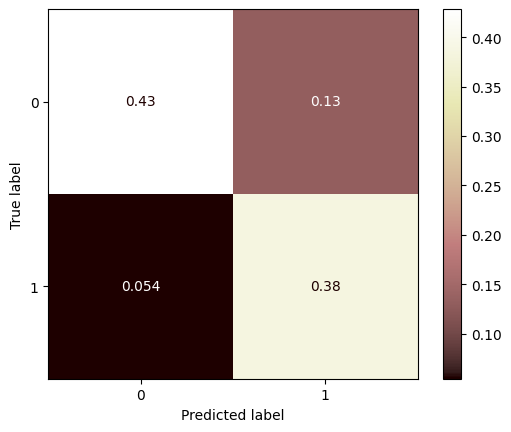

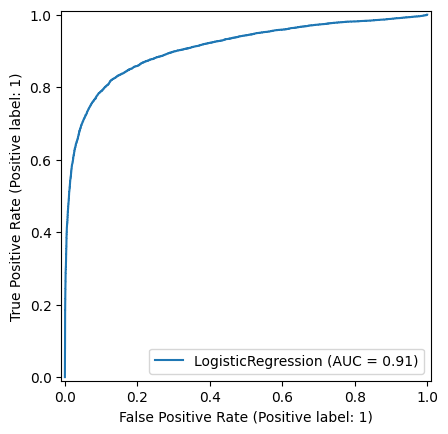

In [54]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

> Elastic Net (누구 피셜 요즘 이게 대세다)
* Elastic Net regularization을 적용한 로지스틱 회귀 모델로,
* **L1 패널티(50%) + L2 패널티(50%)**를 혼합해서 사용
* ❗ 주의: Elastic Net은 'liblinear', 'newton-cg', 'lbfgs'로는 못 돌림.
→ 'saga' 필수



In [55]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.309527
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                61197
Model:                          Logit   Df Residuals:                    61185
Method:                           MLE   Df Model:                           11
Date:                Thu, 17 Jul 2025   Pseudo R-squ.:                  0.5533
Time:                        04:05:47   Log-Likelihood:                -18942.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6437      0.016   -101.562      0.000      -1.675      -1.612
x2             0.2389      0.

>Black-box 모델

* 블랙박스 모델 (예: Random Forest, XGBoost, Neural Networks)

* 내부가 복잡해서 사람이 직관적으로 해석하기 어려움

* feature importance, SHAP 값 같은 도구를 써야 해석 가능

|        | Scikit-learn             | Statsmodels              |
| ------ | ------------------------ | ------------------------ |
| 출력     | 단순 (coef\_, intercept\_) | 상세 (p-value, std err 등)  |
| 유의성 검정 | ❌ 없음                     | ✅ 있음                     |
| 적합도 지표 | ❌ 없음                     | ✅ AIC, BIC, Pseudo R² 제공 |


> 해석
* We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value (McFadden's Pseudo R-Squared Value) of 0.55 represents an excellent fit.



### Model-2: Naive Bayes Classifier

* GaussianNB는 각 feature가 연속형 변수이고, 클래스별로 **가우시안 분포(정규분포)**를 따른다고 가정할 때 사용

Accuracy = 0.8334616569140745
ROC Area under Curve = 0.8345493488740687
Time taken = 0.02481842041015625
              precision    recall  f1-score   support

           0    0.87081   0.82564   0.84762     14573
           1    0.79102   0.84346   0.81640     11403

    accuracy                        0.83346     25976
   macro avg    0.83092   0.83455   0.83201     25976
weighted avg    0.83578   0.83346   0.83392     25976



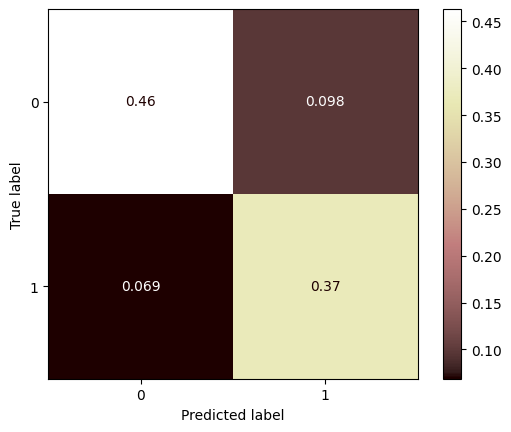

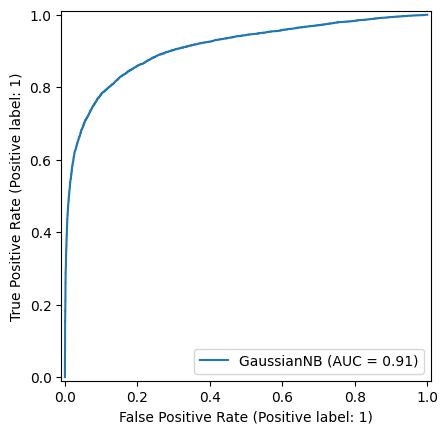

In [56]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

> 알게 된 점

| 종류                | 특징                                          | 사용 데이터 타입          |
| ----------------- | ------------------------------------------- | ------------------ |
| **GaussianNB**    | feature들이 **연속형**이고 클래스별로 **정규분포(가우시안)** 가정 | 연속형 데이터            |
| **MultinomialNB** | feature들이 **카운트 데이터** (ex. 단어 개수)           | 텍스트 분류(TF, TF-IDF) |
| **BernoulliNB**   | feature들이 **이진형(0/1)**                      | 스팸 메일, 바이너리 데이터    |
| **ComplementNB**  | MultinomialNB 개선형, 불균형 데이터셋에 강함             | 텍스트 분류             |

* 현실 데이터는 feature 간 의존성 있음

* 하지만 대부분의 경우 feature 간 상관이 약하면 큰 문제 안 됨

* 특히 텍스트 데이터(TF-IDF)처럼 feature들이 거의 독립인 경우 매우 잘 작동



### Model-3: K-Nearest Neighbor Classifier

Accuracy = 0.8861256544502618
ROC Area under Curve = 0.8870270908506304
Time taken = 17.111382484436035
              precision    recall  f1-score   support

           0    0.91414   0.87964   0.89656     14573
           1    0.85326   0.89441   0.87335     11403

    accuracy                        0.88613     25976
   macro avg    0.88370   0.88703   0.88496     25976
weighted avg    0.88741   0.88613   0.88637     25976



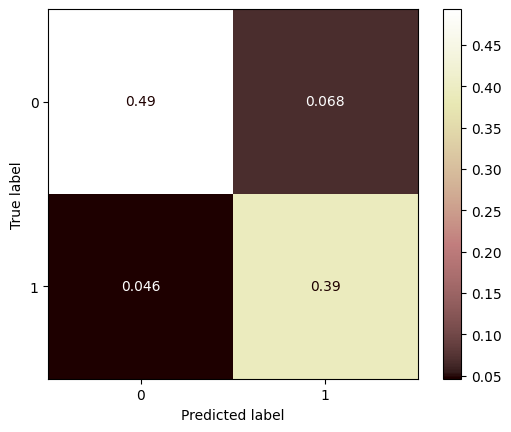

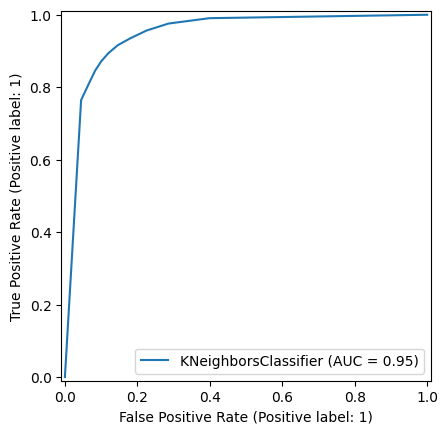

In [57]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### Model-4: Decision Tree Classifier

Accuracy = 0.877040344933785
ROC Area under Curve = 0.8831457583213366
Time taken = 0.09235048294067383
              precision    recall  f1-score   support

           0    0.94094   0.83312   0.88375     14573
           1    0.81397   0.93318   0.86950     11403

    accuracy                        0.87704     25976
   macro avg    0.87746   0.88315   0.87663     25976
weighted avg    0.88520   0.87704   0.87750     25976



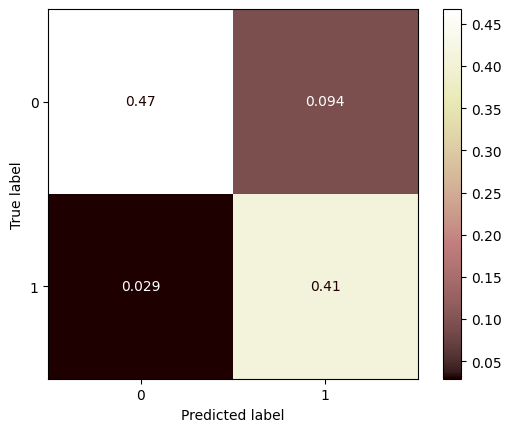

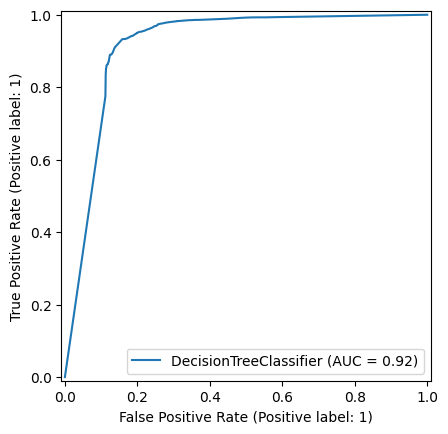

In [58]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,
             'max_features': "sqrt"} # 과적합 방지

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

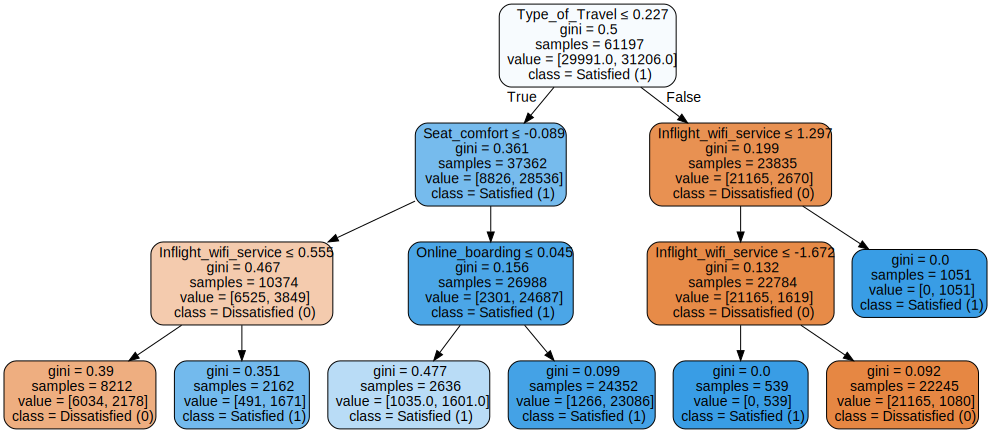

In [61]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None,
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'],
                       filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(data)
graph

> 해석

| 항목                       | 설명                                     |
| ------------------------ | -------------------------------------- |
| `Type_of_Travel ≤ 0.227` | 분할 기준: Type\_of\_Travel 값이 0.227 이하인가? |
| `gini`                   | 지니 불순도 (0이면 완벽히 한 클래스, 0.5에 가까울수록 혼합)  |
| `samples`                | 해당 노드에 속한 데이터 수                        |
| `value`                  | 클래스별 샘플 수 → `[불만족 수, 만족 수]`            |
| `class`                  | 이 노드에서 다수인 클래스 (0=불만족, 1=만족)           |


### Model-5: Neural Network (Multilayer Perceptron)

Accuracy = 0.8763858946720049
ROC Area under Curve = 0.8826960210763148
Time taken = 55.97235441207886
              precision    recall  f1-score   support

           0    0.94183   0.83099   0.88294     14573
           1    0.81224   0.93440   0.86905     11403

    accuracy                        0.87639     25976
   macro avg    0.87703   0.88270   0.87600     25976
weighted avg    0.88494   0.87639   0.87684     25976



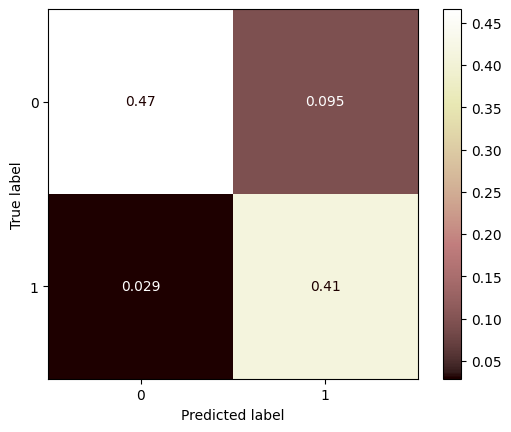

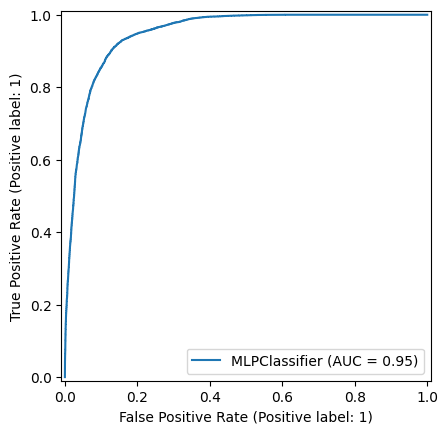

In [62]:
from sklearn.neural_network import MLPClassifier
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

> 왜 쓰지...

| 장점               | 단점                 |
| ---------------- | ------------------ |
| ✅ 비선형 데이터 처리     | ❌ 학습 느림 (큰 데이터셋에서) |
| ✅ 변수 간 상호작용 학습   | ❌ 하이퍼파라미터 튜닝 필요    |
| ✅ 복잡한 문제에도 적용 가능 | ❌ 과적합 위험 (데이터 적으면) |


### Model-6: Random Forest

Accuracy = 0.8941330458885125
ROC Area under Curve = 0.9003728693084586
Time taken = 9.849318504333496
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



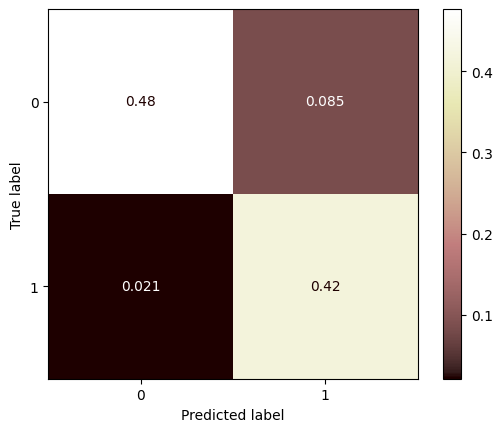

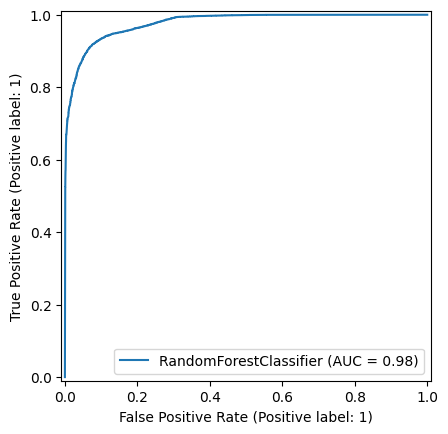

In [63]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

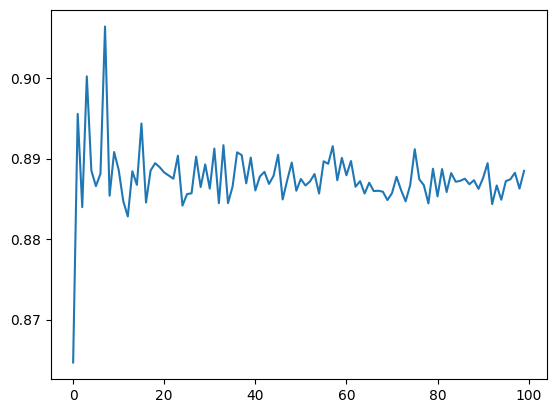

In [64]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

* 목적
  * 트리 개수 증가 → 성능 안정화되는 구간 확인

* 트리 개수가 적을 때는 랜덤성 영향이 크기 때문 개별 트리가 불안정해서 예측 정확도가 들쭉날쭉
* 트리 개수 30~40 이후부터 정확도 변화 거의 없음


### Model-7: Extreme Gradient Boosting

Accuracy = 0.8887434554973822
ROC Area under Curve = 0.8951974804484156
Time taken = 27.838629484176636
              precision    recall  f1-score   support

           0    0.95399   0.84231   0.89468     14573
           1    0.82470   0.94808   0.88210     11403

    accuracy                        0.88874     25976
   macro avg    0.88935   0.89520   0.88839     25976
weighted avg    0.89723   0.88874   0.88916     25976



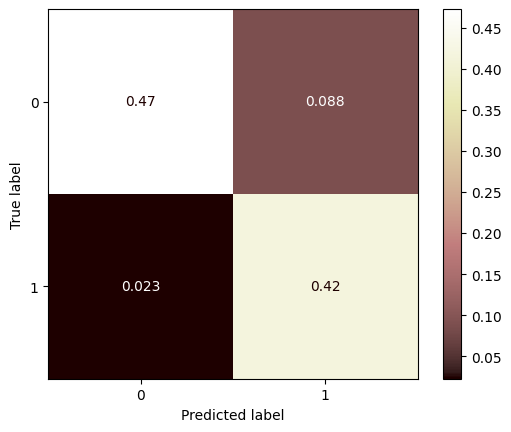

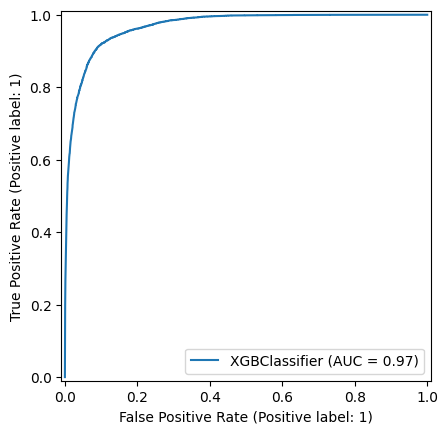

In [75]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Model-8: Adaptive Gradient Boosting

Accuracy = 0.8995611333538651
ROC Area under Curve = 0.9034841895473436
Time taken = 16.66624617576599
              precision    recall  f1-score   support

           0    0.94535   0.87134   0.90684     14573
           1    0.85053   0.93563   0.89105     11403

    accuracy                        0.89956     25976
   macro avg    0.89794   0.90348   0.89894     25976
weighted avg    0.90373   0.89956   0.89991     25976



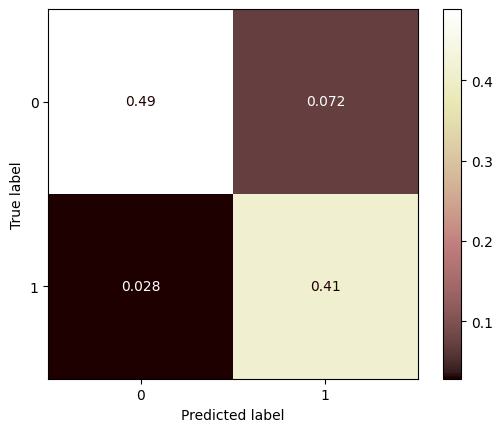

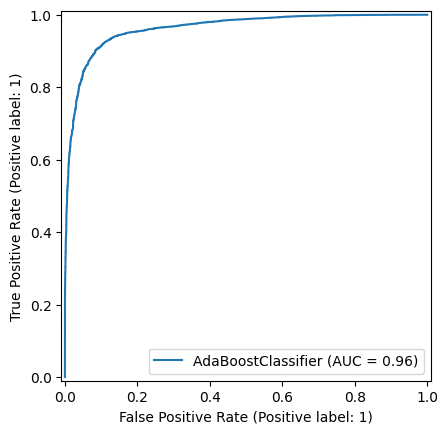

In [77]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

## Decision Region Plotting for Different Models

In [66]:
import warnings
warnings.filterwarnings("ignore")

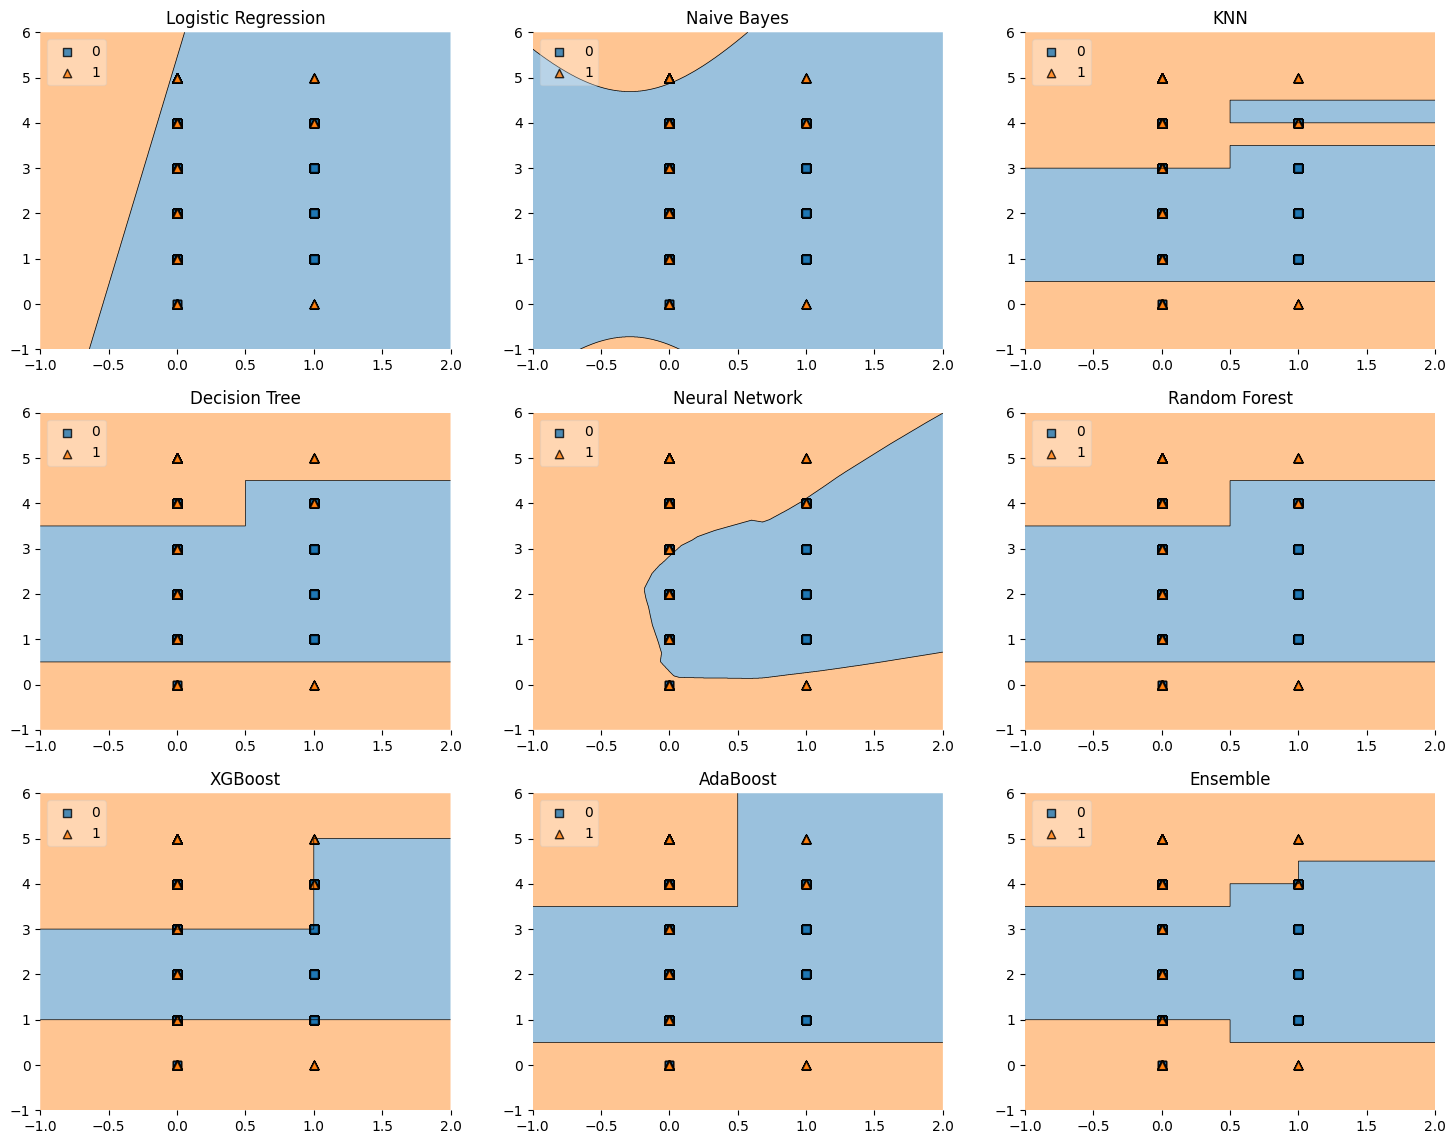

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB() # feature가 정규분포라고 가정
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345)
clf5 = MLPClassifier(random_state=12345, verbose = 0) # verbose=0 → 학습 로그 출력 X
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)


# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value, 3: value}, # 2변수 추출
                                filler_feature_ranges={2: width, 3: width}, # 나머지 변수
                                legend=2)
    plt.title(lab)

plt.show()

> 알게 된 점

* dtype=np.float32 → 실수형(float32)으로 변환 (메모리 효율 ↑, ML 모델 호환 ↑)
* 각 subplot마다 하나의 모델의 결정 경계(decision boundary) 표시
* 색상으로 클래스 구분 영역 표현
* 한눈에 모델별 분류 방식 차이 확인 가능:

> 그래프 해석

배경 색:

파란색 → 클래스 0으로 분류된 영역

주황색 → 클래스 1로 분류된 영역

점 모양:

□ (square) → 실제 클래스 0

△ (triangle) → 실제 클래스 1

| 모델                  | 경계 형태     | 특징                    |
| ------------------- | --------- | --------------------- |
| Logistic Regression | 직선        | 단순하지만 비선형 데이터에 한계     |
| KNN                 | 불규칙 곡선    | 국소 패턴 잘 잡지만 노이즈 민감    |
| Random Forest       | 부드러운 계단형  | 안정적, 노이즈 덜 민감         |
| Neural Network      | 복잡한 곡선    | 비선형 패턴 학습 잘함, 과적합 주의  |
| Ensemble            | 세련된 복합 경계 | 세 모델 장점 결합 → 정교하고 안정적 |

> x,y축의 비밀

* 지금 보고 있는 결정 경계(decision boundary) 그래프의 x축, y축은 사실 데이터의 2개의 선택된 feature를 의미

| 상황                        | 설명                      |
| ------------------------- | ----------------------- |
| 🏆 **상위 2개 feature가 압도적** | 결정경계가 현실과 거의 같아짐        |
| ⚠️ **모든 feature 영향력 비슷**  | 잘못된 분류 경계로 오해할 가능성 ↑    |
| 🔥 **상위 2개 + 나머지 고정 적절**  | 어느 정도 유효, 하지만 해석시 주의 필요 |





## Model Comparison

We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

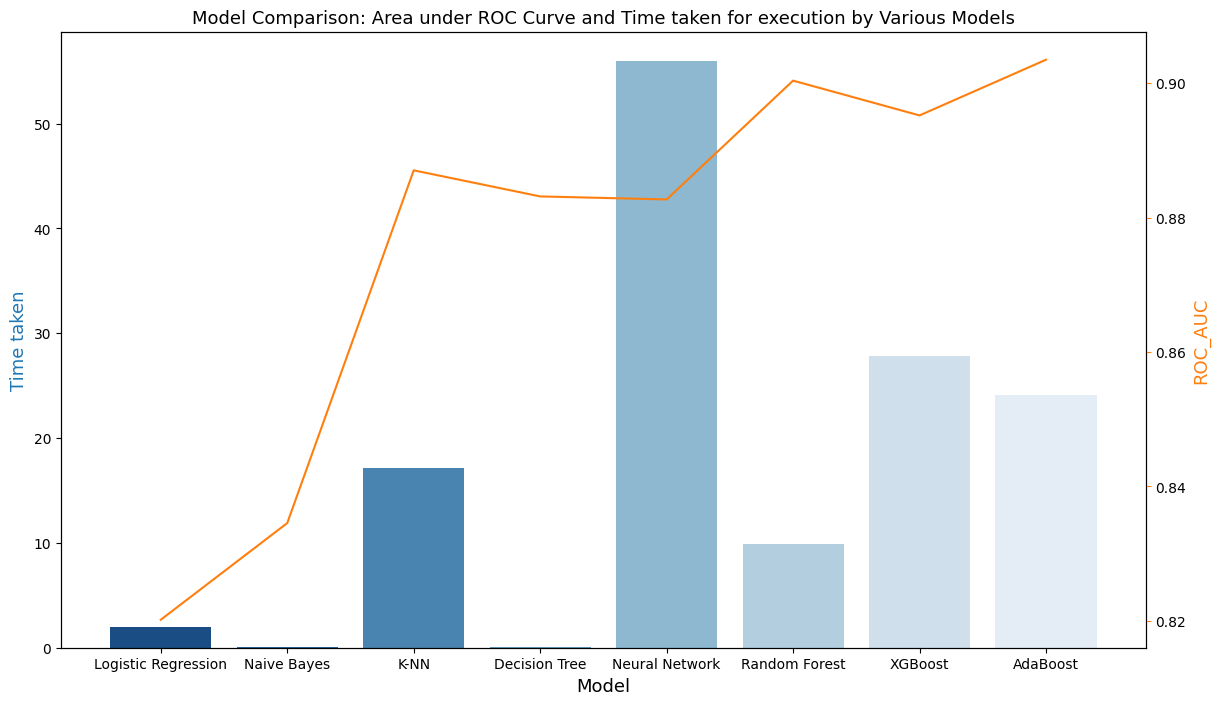

In [76]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)